<a href="https://colab.research.google.com/github/Matheus2608/Projeto-ML/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importando a base de dados

In [33]:
import pandas as pd 
df = pd.read_csv('SA_heart.csv')


In [2]:
print(f"A base de dados apresenta {df.shape[0]} registros e {df.shape[1] - 1} variáveis")

A base de dados apresenta 462 registros e 10 variáveis


In [3]:
df.head(10)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


## Transformando os dados do atributo famhist

In [5]:
df.famhist = df.famhist.apply(lambda x: 1 if x == "Present" else 0)
df.head()

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


## Informações estatísticas dos dados

In [6]:
df_sem_id = df.drop('id', axis=1)
df_sem_id.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


## Distribuição dos dados

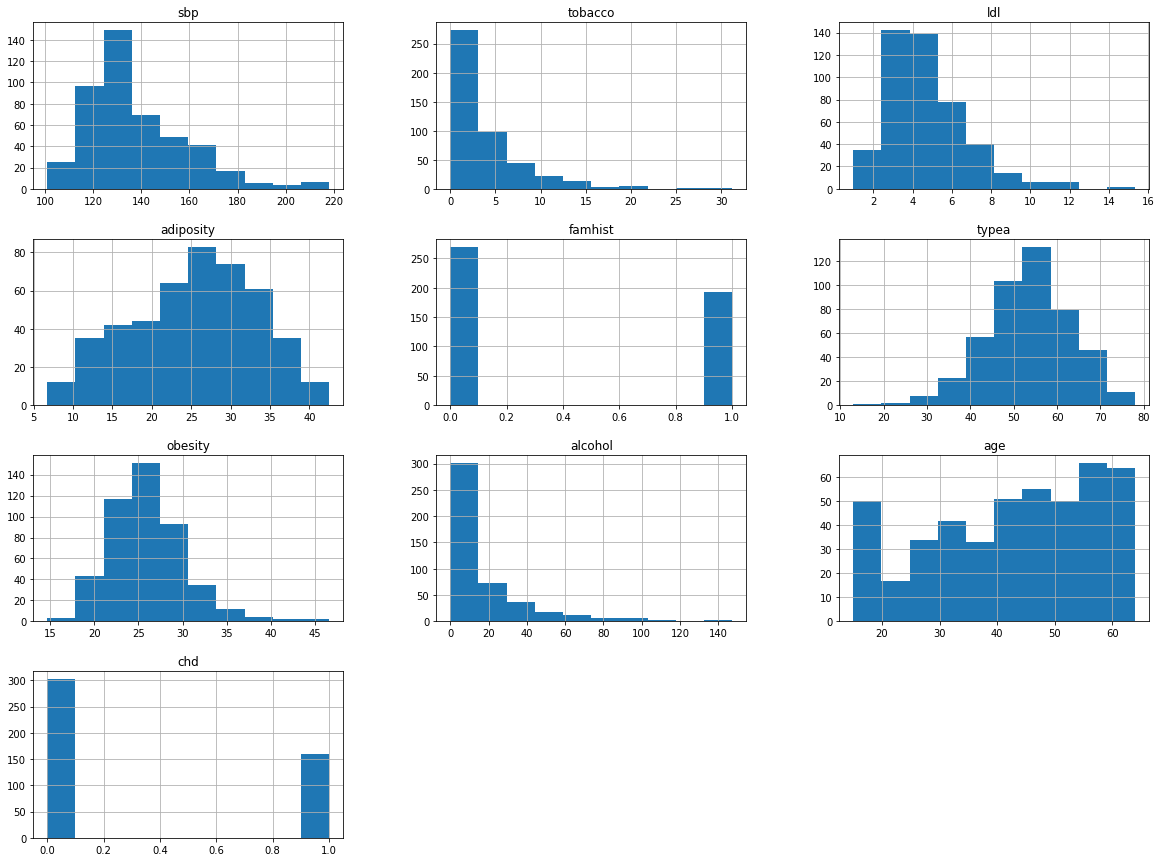

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df_sem_id.hist(figsize=(20,15))
plt.show()

## Correlação das variáveis

In [8]:
matriz_correlacao = df_sem_id.corr()

In [9]:
matriz_correlacao['chd'].sort_values(ascending=False)

chd          1.000000
age          0.372973
tobacco      0.299718
famhist      0.272373
ldl          0.263053
adiposity    0.254121
sbp          0.192354
typea        0.103156
obesity      0.100095
alcohol      0.062531
Name: chd, dtype: float64

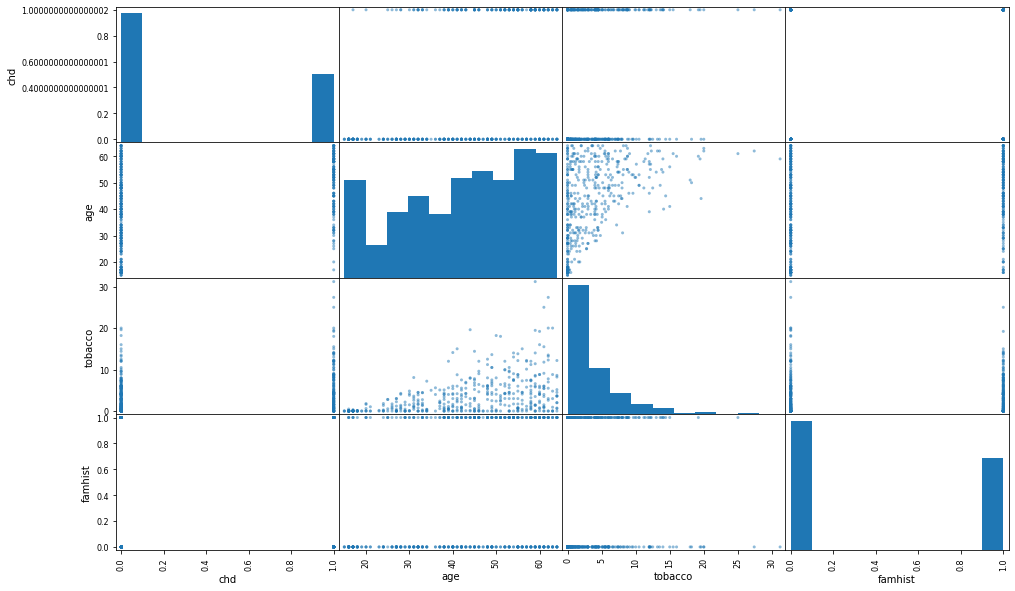

In [10]:
from pandas.plotting import scatter_matrix
atributos = ["chd", "age", "tobacco", "famhist"]
scatter_matrix(df[atributos], figsize=(16,10))
plt.show()


## Separação de Dados

In [11]:
from sklearn.model_selection import  train_test_split
x = df.values[:,0:10]
y = df.values[:,10]
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.1, random_state=0)

In [12]:
x_treinamento.shape, x_teste.shape, y_treinamento.shape, y_teste.shape

((415, 10), (47, 10), (415,), (47,))

### Importando as bibliotecas necessárias para a avalidação dos modelos

In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier



In [14]:
fp_rate_tp_rate_auc_nome = []
def avaliacao_modelo(modelo, nome_modelo):
  '''Recebe um modelo como parâmetro e retorna a matriz de confusão, curva roc e auc roc usando validação cruzada com 10% dos dados para teste'''
  y_train_prepared = cross_val_predict(modelo, x_treinamento, y_treinamento, cv=10)
  print("Matriz de Confusão:")
  print(confusion_matrix(y_treinamento, y_train_prepared))

  modelo_probs = cross_val_predict(modelo, x_treinamento, y_treinamento ,cv=10, method='predict_proba')[:, 1] # pontuaçao = probabilidade da classe positiva
  modelo_fp_rate, modelo_tp_rate, threshold = roc_curve(y_treinamento, modelo_probs)
  modelo_auc = roc_auc_score(y_treinamento, modelo_probs)

  plt.figure(figsize=(8,6), dpi=100)
  plt.plot(modelo_fp_rate, modelo_tp_rate,linestyle='--', label=f"{nome_modelo} (AUROC = %0.3f)" % modelo_auc)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Curva ROC")
  plt.legend()
  plt.show()
  fp_rate_tp_rate_auc_nome.append((modelo_fp_rate, modelo_tp_rate, modelo_auc, nome_modelo))

## Árvore de Decisão

Matriz de Confusão:
[[198  78]
 [ 87  52]]


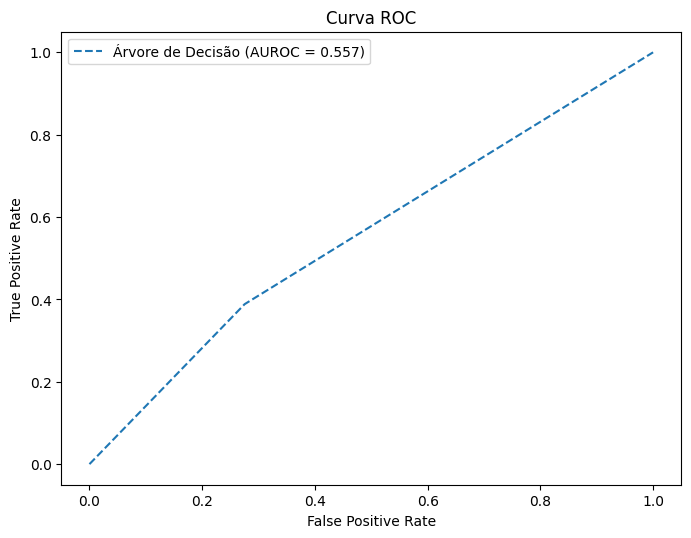

In [15]:
modelo1, nome1 = DecisionTreeClassifier(), "Árvore de Decisão"
avaliacao_modelo(modelo1, nome1)

## Testando outros modelos
Com base nos dados, é necessário ver outros modelos pois as medidas de desempenho não foram bons

## Floresta Randômica

Matriz de Confusão:
[[225  51]
 [ 82  57]]


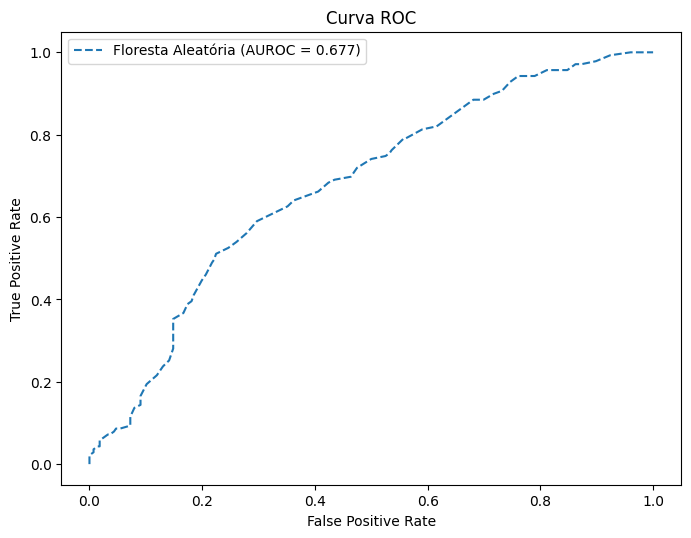

In [16]:
modelo2, nome2 = RandomForestClassifier(n_estimators=100, max_features=9, random_state=0), "Floresta Aleatória"
avaliacao_modelo(modelo2, nome2)

## Floresta Randômica Reduzida

Matriz de Confusão:
[[234  42]
 [ 84  55]]


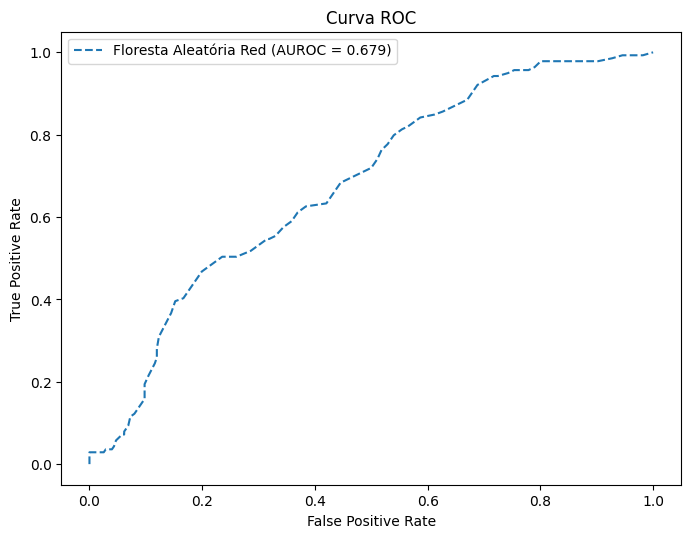

In [17]:
modelo3, nome3 = RandomForestClassifier(n_estimators=100, max_features=3, random_state=0), "Floresta Aleatória Red"
avaliacao_modelo(modelo3, nome3)

## Curva ROC de todos os modelos para uma melhor visualização

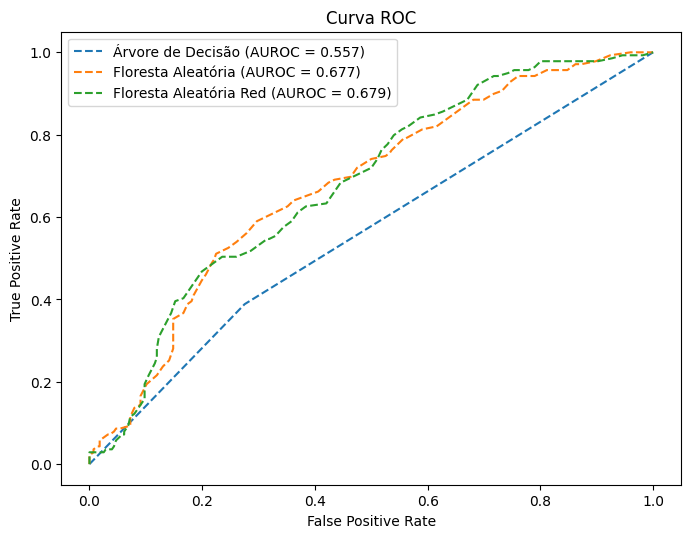

In [18]:
plt.figure(figsize=(8,6), dpi=100)
for fp_rate, tp_rate, auc, nome in fp_rate_tp_rate_auc_nome:
  plt.plot(fp_rate, tp_rate ,linestyle='--', label=f"{nome} (AUROC = %0.3f)" % auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


## Modelo que mais se encaixou
Analizando as medições de desempenho e os gráficos de cada modelo, a floresta randômica com um numero reduzido de características foi a que mais se adequou ao problema.



## Avaliando o modelo mais promissor com o conjunto de teste

In [19]:
rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=0)
rf.fit(x_treinamento, y_treinamento)
predicoes = rf.predict(x_teste)
print("Acurácia:", accuracy_score(y_teste, predicoes))
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, predicoes))



Acurácia: 0.6808510638297872
Matriz de Confusão:
[[22  4]
 [11 10]]


Ainda possui uma acurácia pequena que pode ser melhorada

## Características mais importantes

In [20]:
modelo_mais_adequado = rf
importancia_caracteristicas = modelo_mais_adequado.feature_importances_[:-1]
caracteristicas = df_sem_id.columns[:-1]


<Figure size 1152x720 with 0 Axes>

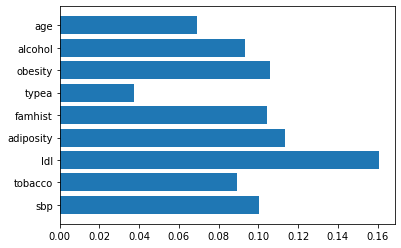

<Figure size 1152x720 with 0 Axes>

In [21]:
plt.barh(caracteristicas, importancia_caracteristicas)
plt.figure(figsize=(16,10))

### Para uma melhor visualização

Text(0.5, 0, 'Random Forest Feature Importance')

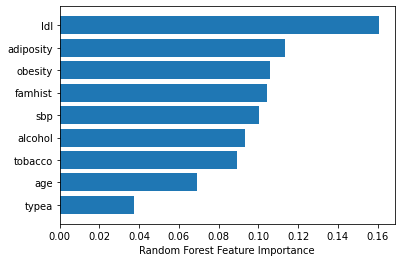

In [22]:
id_ordenado = importancia_caracteristicas.argsort()
plt.barh(caracteristicas[id_ordenado], importancia_caracteristicas[id_ordenado])
plt.xlabel("Random Forest Feature Importance")

- As duas principais características são ldl e adiposity.
- Modelos de Árvore mostram que nem sempre as variáveis que tem mais correlação são as melhores para o modelo funcionar melhor.

## Referências
- https://www.youtube.com/watch?v=uVJXPPrWRJ0
- https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
- Livro Hands On Machine Learning


## Rearranjo dos dados

In [36]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('SA_heart.csv')
df.famhist = df.famhist.apply(lambda x: 1 if x == "Present" else 0)
y = df.values[:,10]
std = StandardScaler()
df = df.drop(["chd", "id"], axis=1)
columns = df.columns
df_std = std.fit_transform(df)

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(df_std, y, test_size=0.1, random_state=0)

In [40]:
x_treinamento.shape, x_teste.shape


((415, 9), (47, 9))

Matriz de Confusão:
[[202  74]
 [ 86  53]]


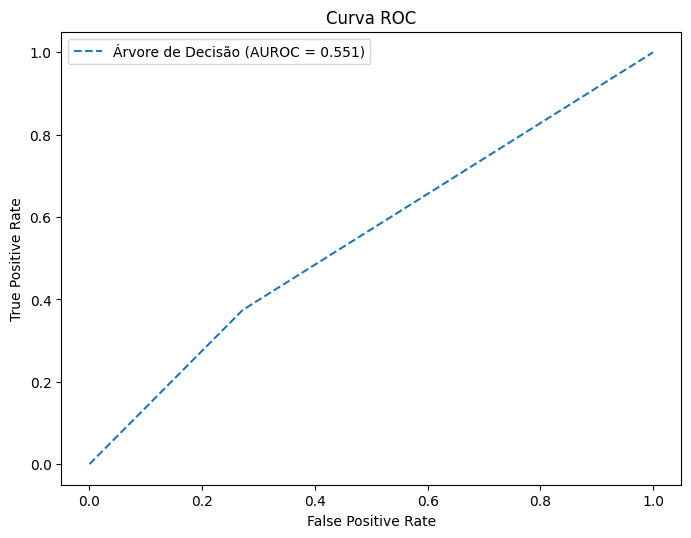

In [38]:
modelo1, nome1 = DecisionTreeClassifier(), "Árvore de Decisão"
avaliacao_modelo(modelo1, nome1)

Matriz de Confusão:
[[226  50]
 [ 84  55]]


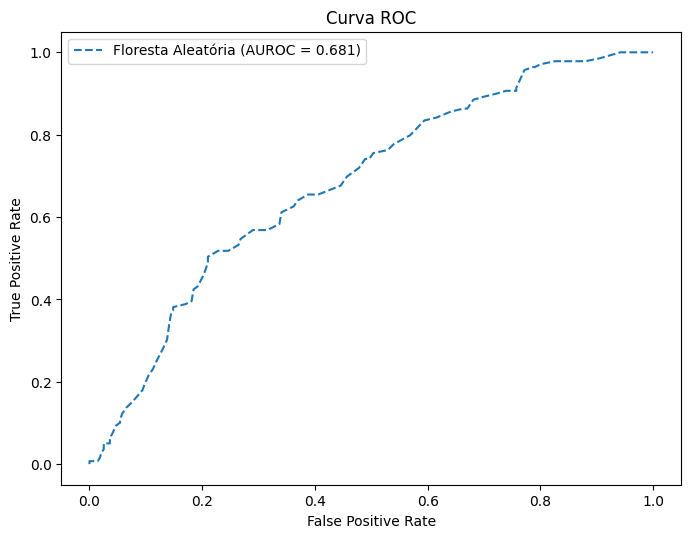

In [39]:
modelo2, nome2 = RandomForestClassifier(n_estimators=100, max_features=9, random_state=0), "Floresta Aleatória"
avaliacao_modelo(modelo2, nome2)

Matriz de Confusão:
[[233  43]
 [ 88  51]]


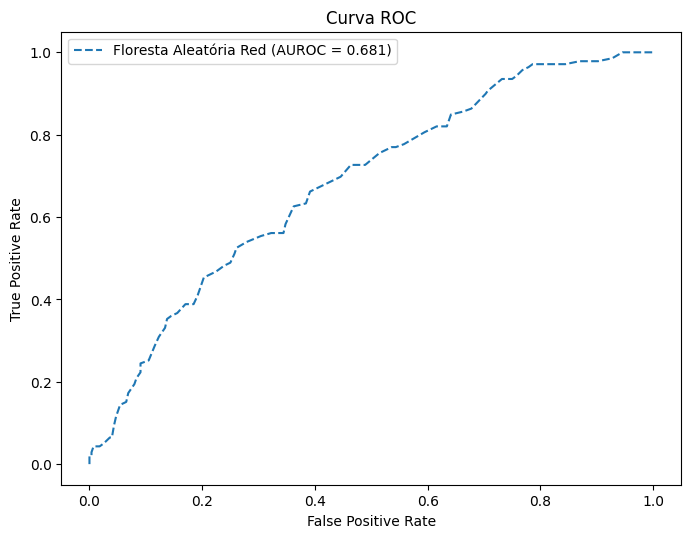

In [41]:
modelo3, nome3 = RandomForestClassifier(n_estimators=100, max_features=3, random_state=0), "Floresta Aleatória Red"
avaliacao_modelo(modelo3, nome3)

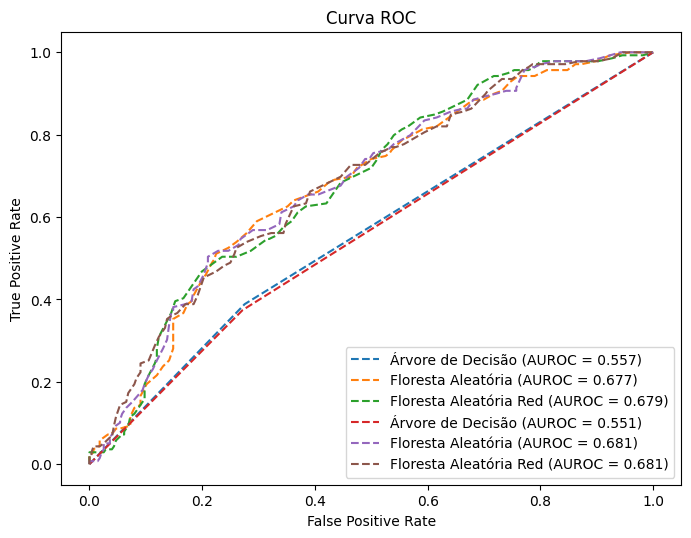

In [42]:
plt.figure(figsize=(8,6), dpi=100)
for fp_rate, tp_rate, auc, nome in fp_rate_tp_rate_auc_nome:
  plt.plot(fp_rate, tp_rate ,linestyle='--', label=f"{nome} (AUROC = %0.3f)" % auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [43]:
rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=0)
rf.fit(x_treinamento, y_treinamento)
predicoes = rf.predict(x_teste)
print("Acurácia:", accuracy_score(y_teste, predicoes))
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, predicoes))

Acurácia: 0.7021276595744681
Matriz de Confusão:
[[22  4]
 [10 11]]
